In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter
t = UNITS.day

<Unit('day')>

In [3]:
v = Vector(0, -30300) * m / s
r = Vector(146e9, 0) * m
init = State(x = r.x,
             y = r.y,
             vx = v.x,
             vy = v.y)

,values
x,146000000000.0 meter
y,0.0 meter
vx,0.0 meter / second
vy,-30300.0 meter / second


In [20]:
r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=5e7 * s)

,values
init,x 146000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
m2,5.972e+24 kilogram
t_0,0 second
t_end,50000000.0 second


In [21]:
def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    
    r = Vector(x, y)
    mag = G * m1 * m2 / r.mag**2
    direction = r.hat()
    force = direction * mag
    return force

In [22]:
universal_gravitation(init, system)


<Quantity([3.71907617e+22 0.00000000e+00], 'newton')>

In [23]:
def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy= state
    unpack(system)    
    v = Vector(vx, vy)
    
    force = universal_gravitation(state, system)
    dxdt = v.x
    dydt = v.y
    dvdt = -force / m2
    
    return dxdt, dydt, dvdt.x, dvdt.y

In [24]:
slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(-30300.0, 'meter / second')>,
 <Quantity(-0.006227522049164946, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [25]:
def event_func(state, t, system):
    x, y, vx, vy = state
    return x

In [26]:
event_func(init, 0, system)

<Quantity(146000000000.0, 'meter')>

In [27]:
results, details = run_ode_solver(system, slope_func)
details

,values
sol,None
t_events,[]
nfev,176
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [28]:
t_final = get_last_label(results) * s

<Quantity(50000000.0, 'second')>

In [29]:
t_final.to(UNITS.day)

<Quantity(578.7037037037036, 'day')>

In [30]:

ts = linspace(t_0, t_final, 250)
results, details = run_ode_solver(system, slope_func, t_eval=ts)

In [31]:
results.index /= 60 * 60 * 24

In [32]:
rx = results.x / 1e9;
ry = results.y / 1e9;

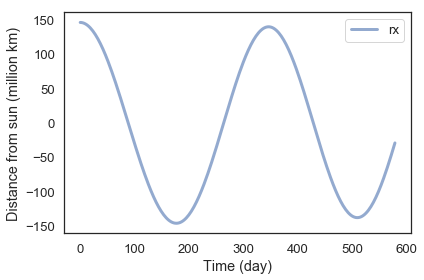

In [33]:
plot(rx, label='rx')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun (million km)')

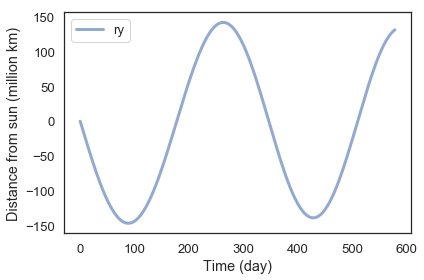

In [34]:
plot(ry, label='ry')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun (million km)')

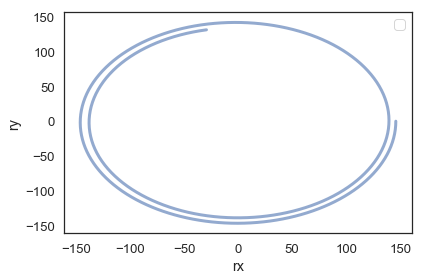

In [37]:
plot(rx, ry)
decorate(xlabel='rx',
         ylabel='ry')